# Here we are predict the House Price

## Domain Analysis

In [461]:
import numpy as np # use for numerical function
import pandas as pd # use for data cleaning and data analysis
import matplotlib.pyplot as plt # use for data visualization
import seaborn as sns # use for data visualization
from ydata_profiling import ProfileReport  # use for auto EDA part create
import warnings # use for ignore the warning
warnings.filterwarnings("ignore")

In [462]:
# load the dataset
data = pd.read_csv("housing (1).csv")
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### Business Case
* Here we are predict the house price based on check the different condition near by house like Logitude and latitude, total rooms, total bedrooms, 
population or houshold, ocean proximity etc.

#### Attribute Information:-
**Longtitide:-** 
It is a show the east or west in Prime Meridian.
**Lattitude:-**
It is a location of equator.
**housing_median_age:-**
It is a show the age of house in particular age.
**Total_rooms:-**
It is a show the total rooms in house.
**Total_bedrooms:-**
It is a show the total bedrooms in house.
**Population:-**
It is a show the total Population near by house area.
**Household:-**
It is a group of people like single individual livivng alone.
**Median_Income:-**
It is a meddle level of income in group of income.
**Median_House_Value:-**
It is a show the house price.
**Ocean_proximity:-**
It is a show the house is near by which ocean.

## Basick Check

In [463]:
data.head() # showning the top 5 data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [464]:
data.tail() # showning the last 5 data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [465]:
data.describe() # show the continous column numerical value

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Insights:-**
* Here we can see the average age of house is 28.
* Here we can see the average total rooms is 2635.
* Here we can see the average total_bedrooms is 537.
* Here we can see the Average population is 1425.

In [466]:
data.describe(include="O") # show the categorical column numerical value

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

**Insights:-**
* Here We can see the Total 5 unique value in ocean_proximity and most frequent use is <1H OCEAN.

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Insghts:-**
* Here we can see the total 20640 data in this dataset.
* Here we can see the null value in total_Bedrooms.
* Here we can see the Total folat type column is 9 and object type is 1.

## EDA:- Exploratory Data Analysis

In [468]:
# store the column name in one variable
for column in data:
    print(column)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


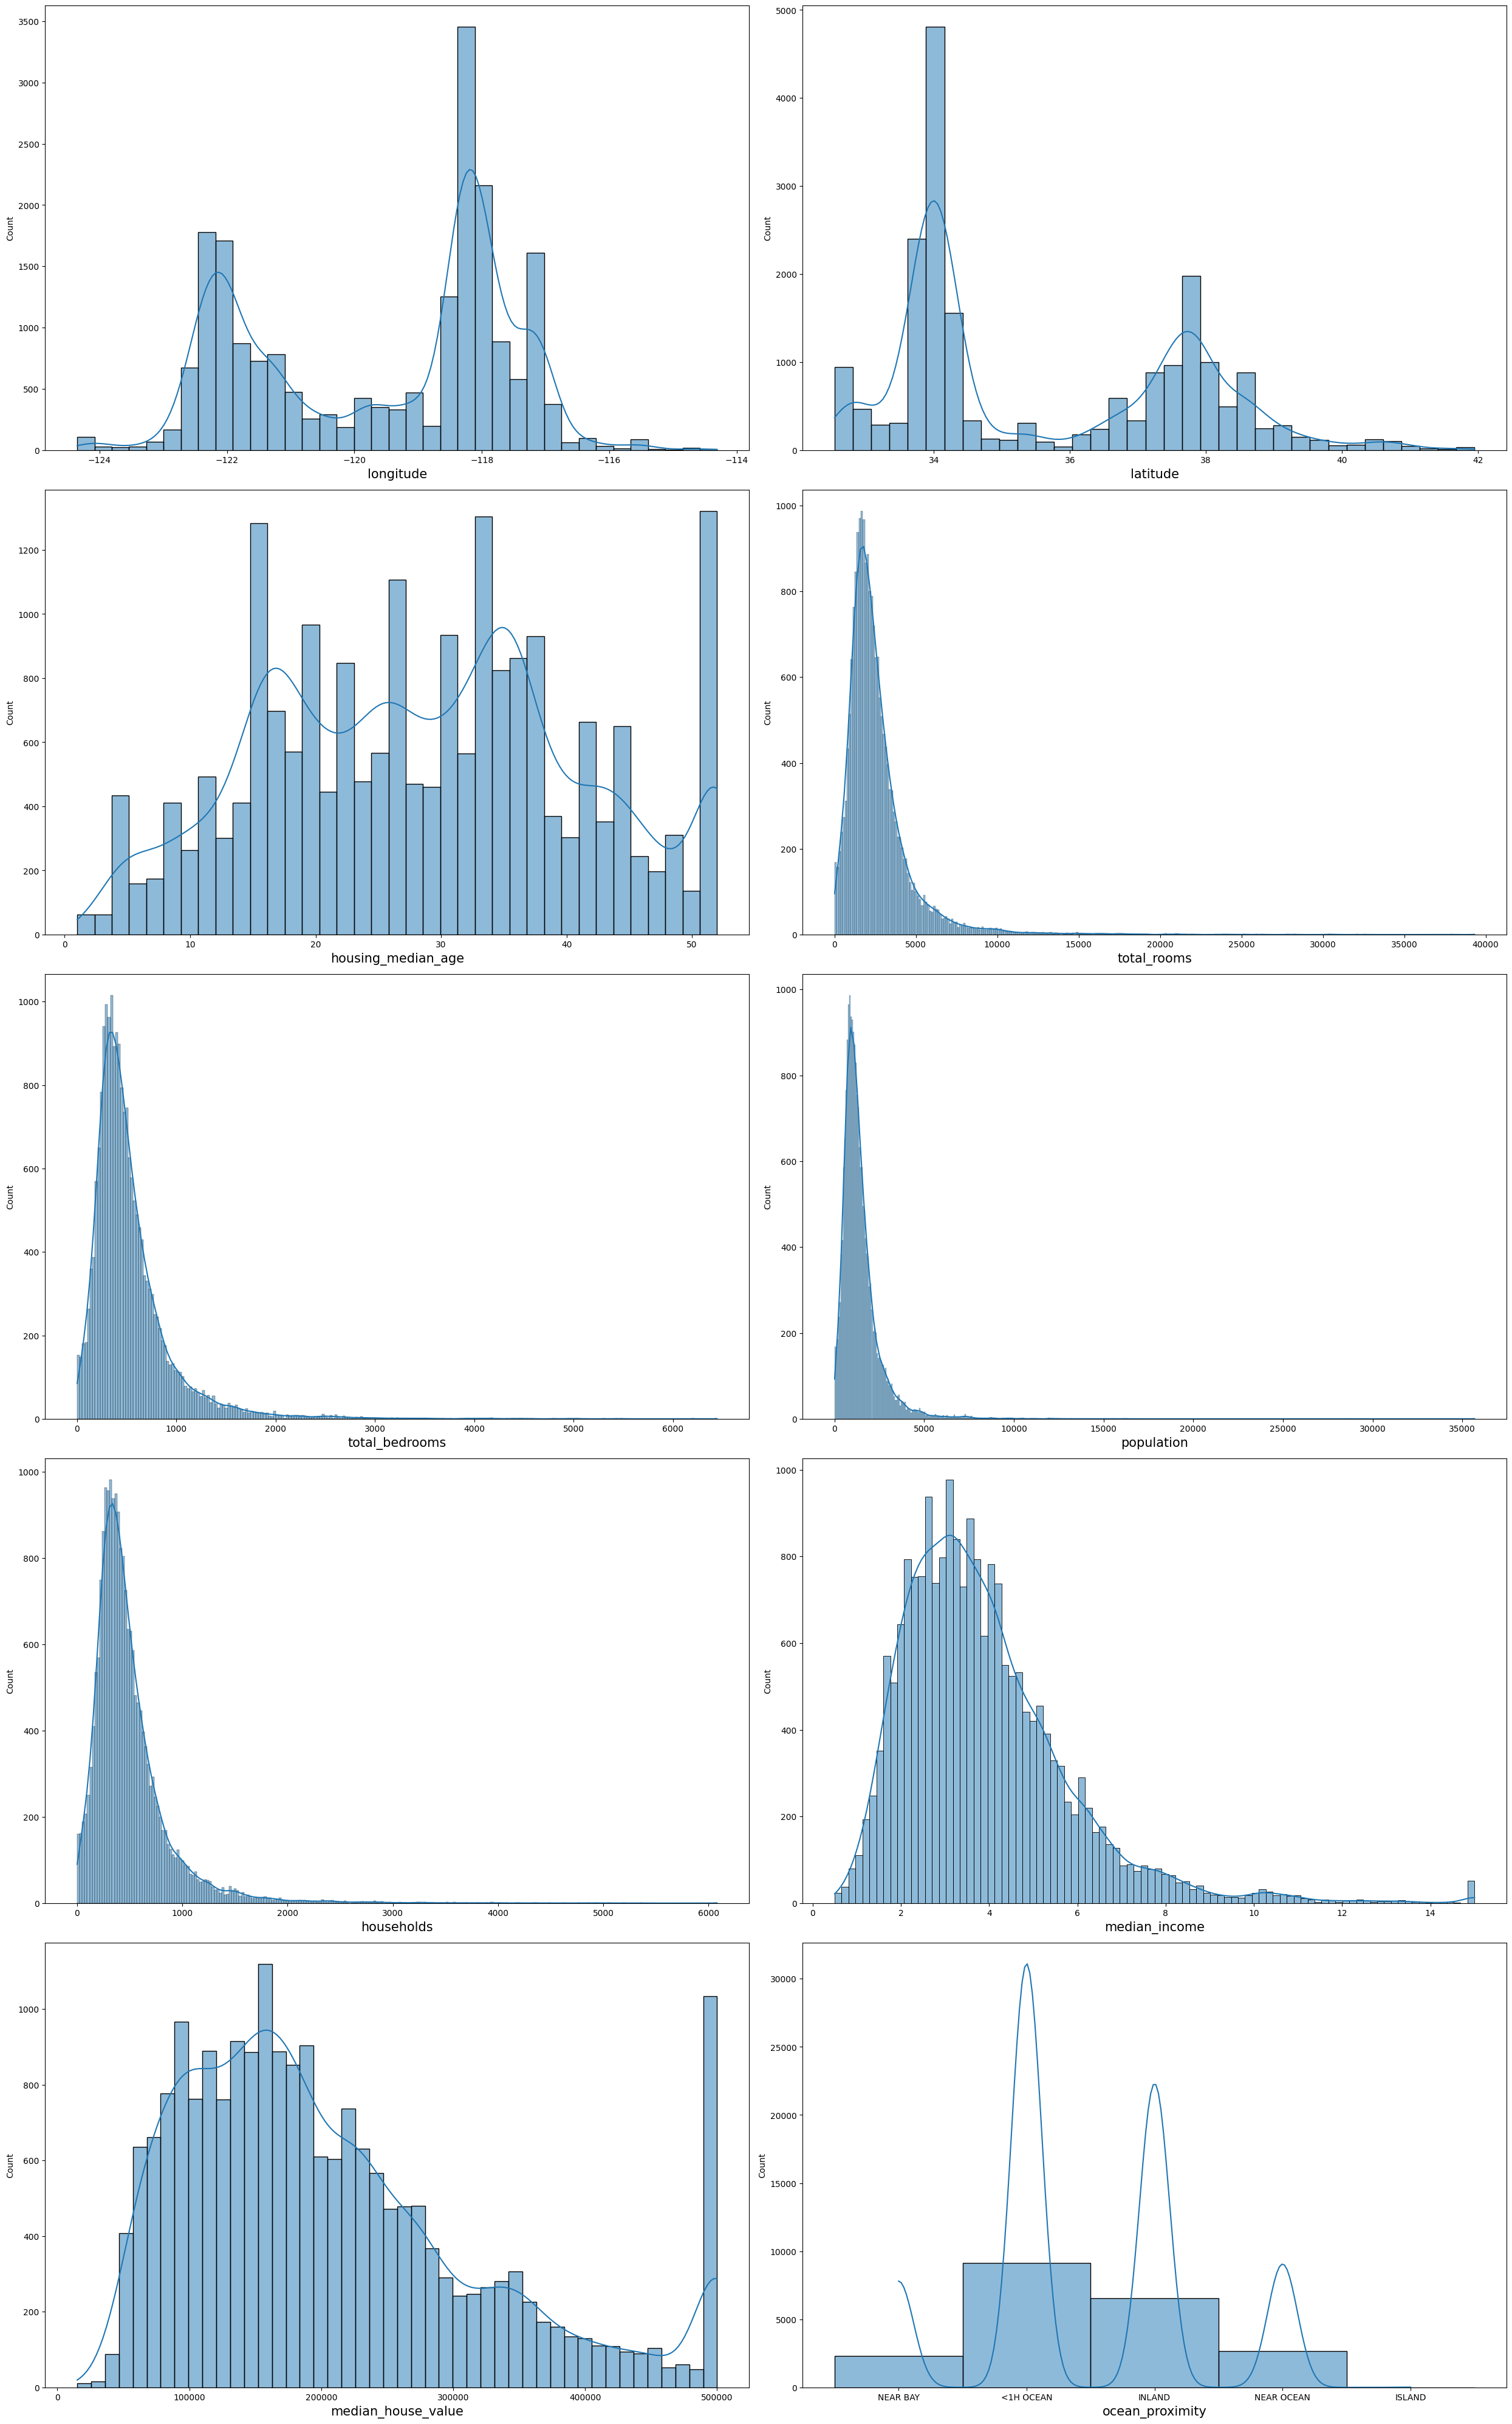

In [469]:
# univeriant Analysis
plt.figure(figsize=(25,40)) # define the plot size
plt_num = 1
for column in data:
    if plt_num <= 10:
        plt.subplot(5,2,plt_num)
        sns.histplot(data[column],kde=True) # create the histogram plot
        plt.xlabel(column,fontsize =15)
    plt_num += 1
plt.tight_layout()

* Here we can not see the any Normal Distribution in any column.

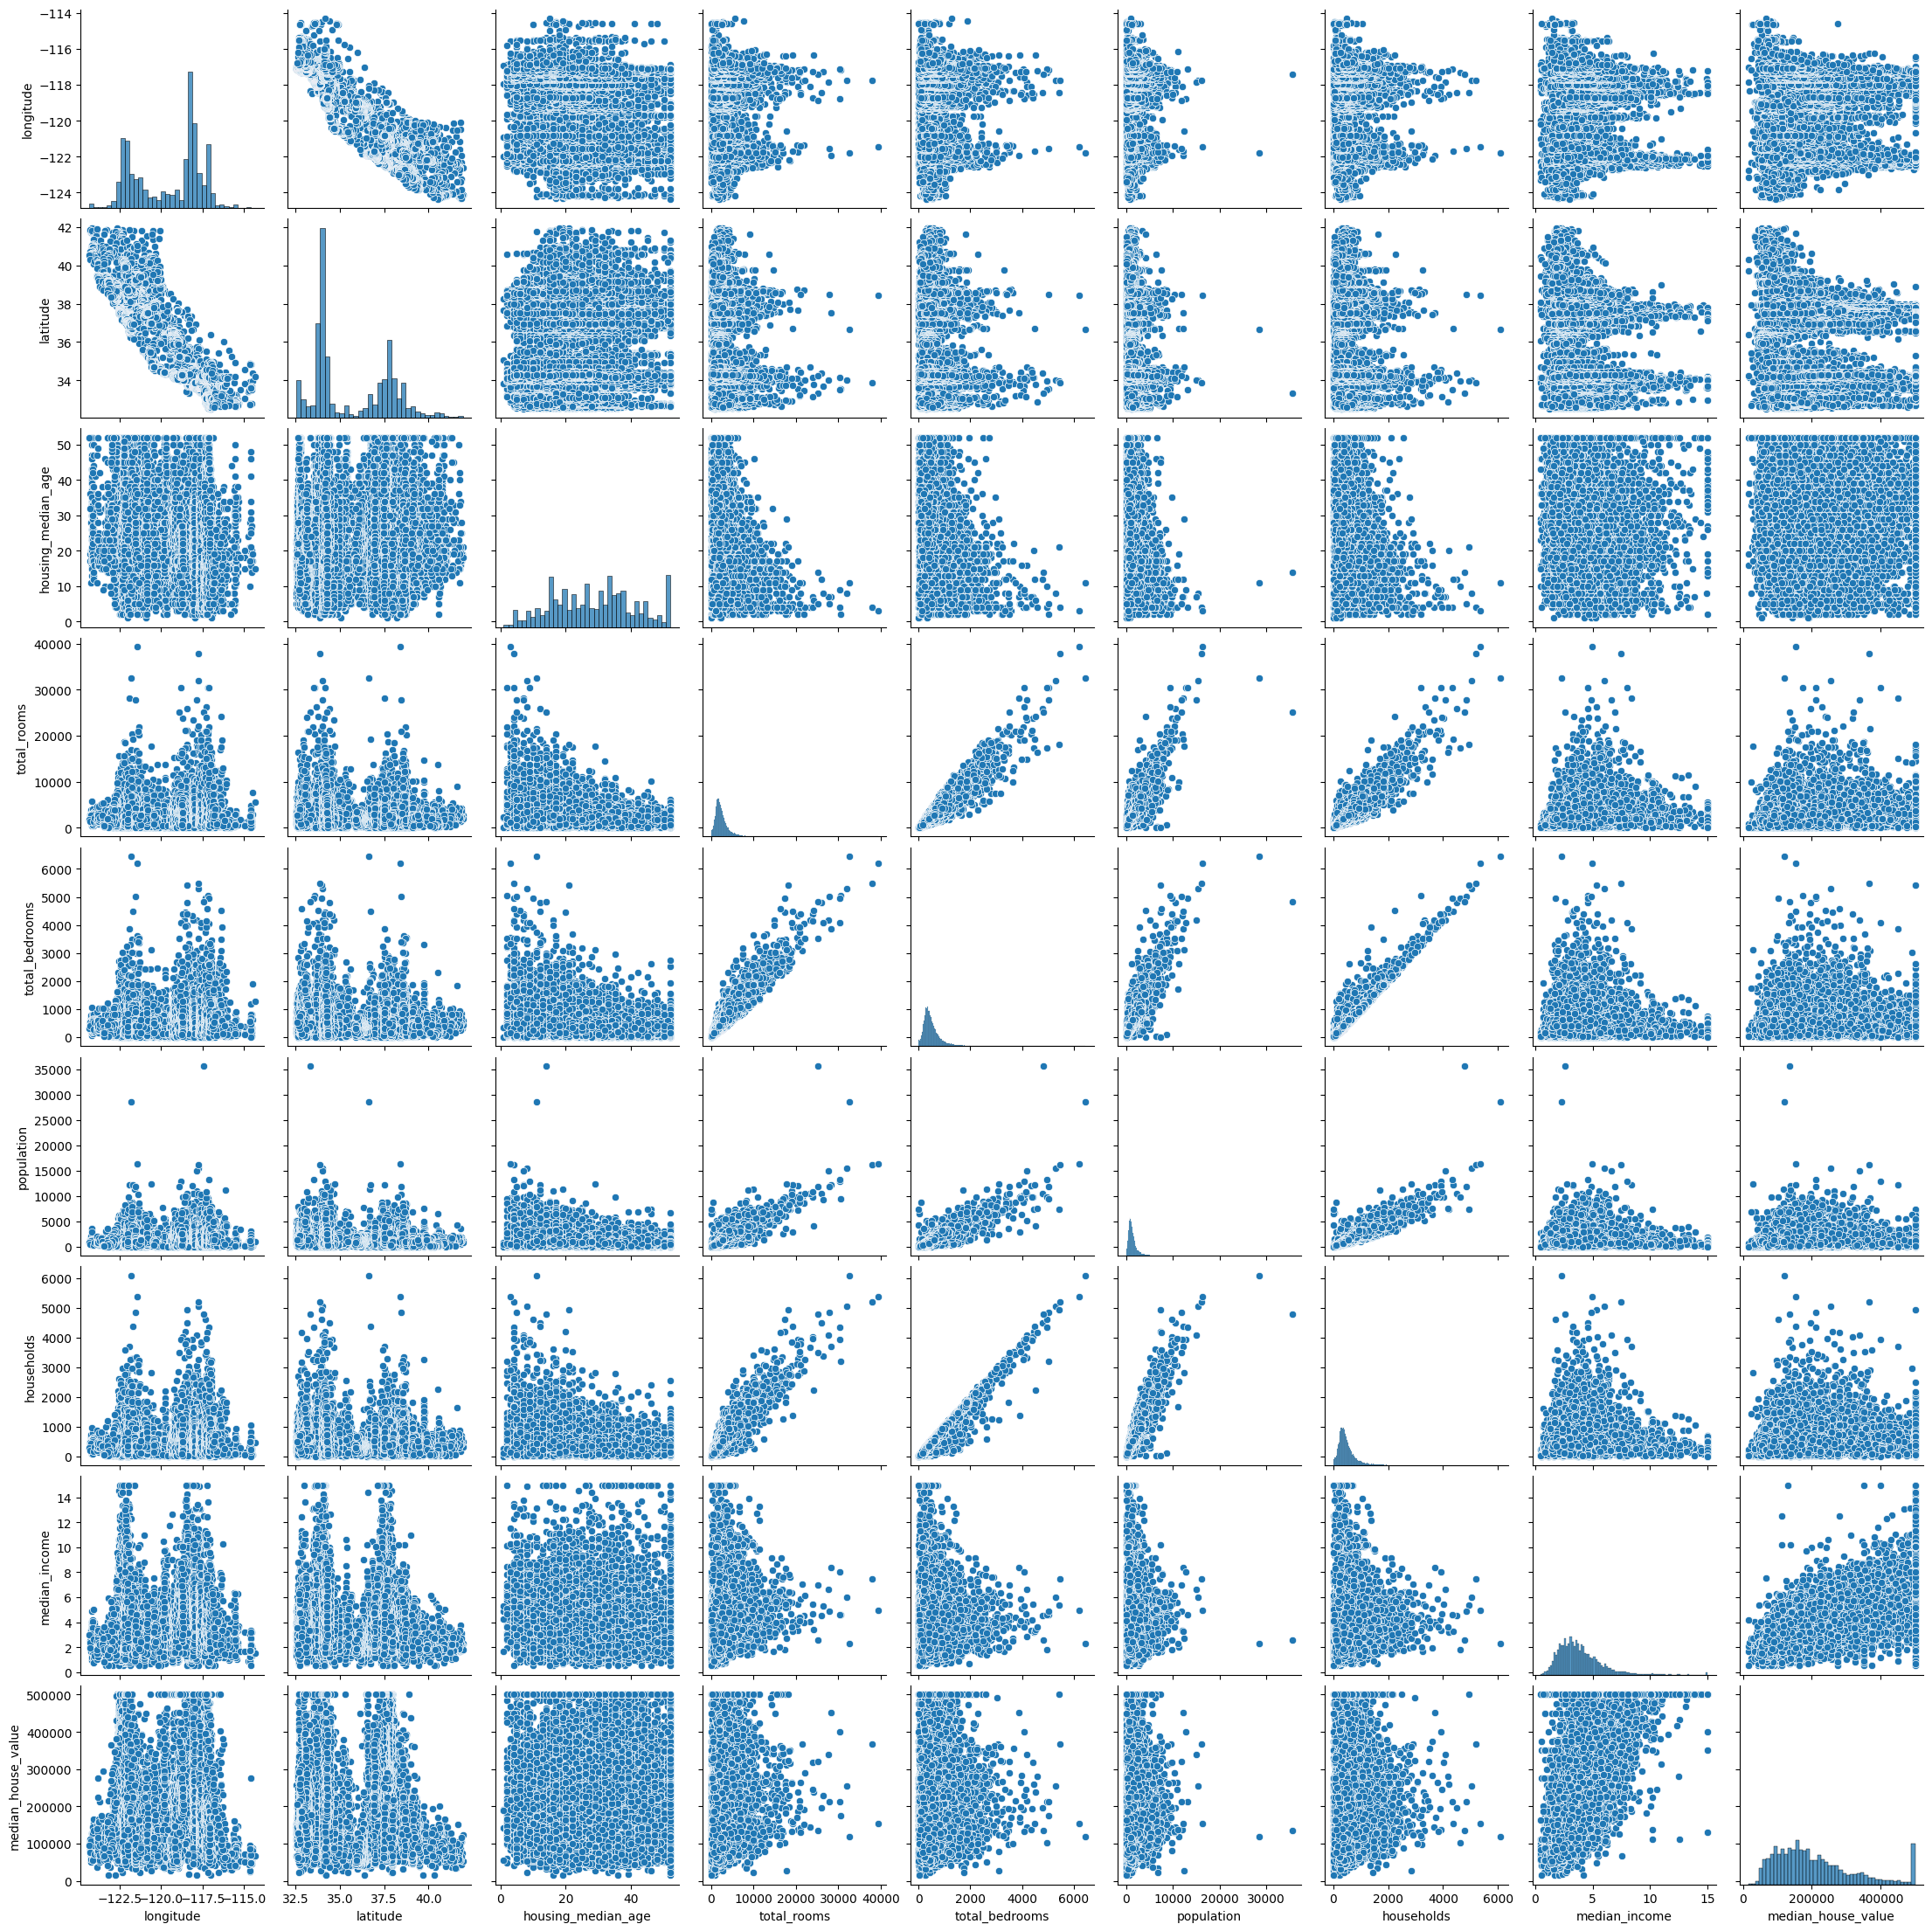

In [470]:
# Multivarinat Analysis:-
sns.pairplot(data)

* Here we can see the possitive corelation between total_rooms and total_bedrooms.
* Here we can see the possitive corelation between total_rooms and household.
* Here we can see the possitive corelation between total_bedroom and household.
* Here we can see the Negative corelation between logtitude and latitude.

## Data Preprocessing

In [471]:
data.isnull().sum() # check the null value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Here we can see the null value in total_bedrooms.

In [472]:
data.total_bedrooms.median() # find the median

435.0

In [473]:
data.loc[data["total_bedrooms"].isnull(),"total_bedrooms"] = 435.0 # handle the null values

In [474]:
data.isnull().sum() # check the null value

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

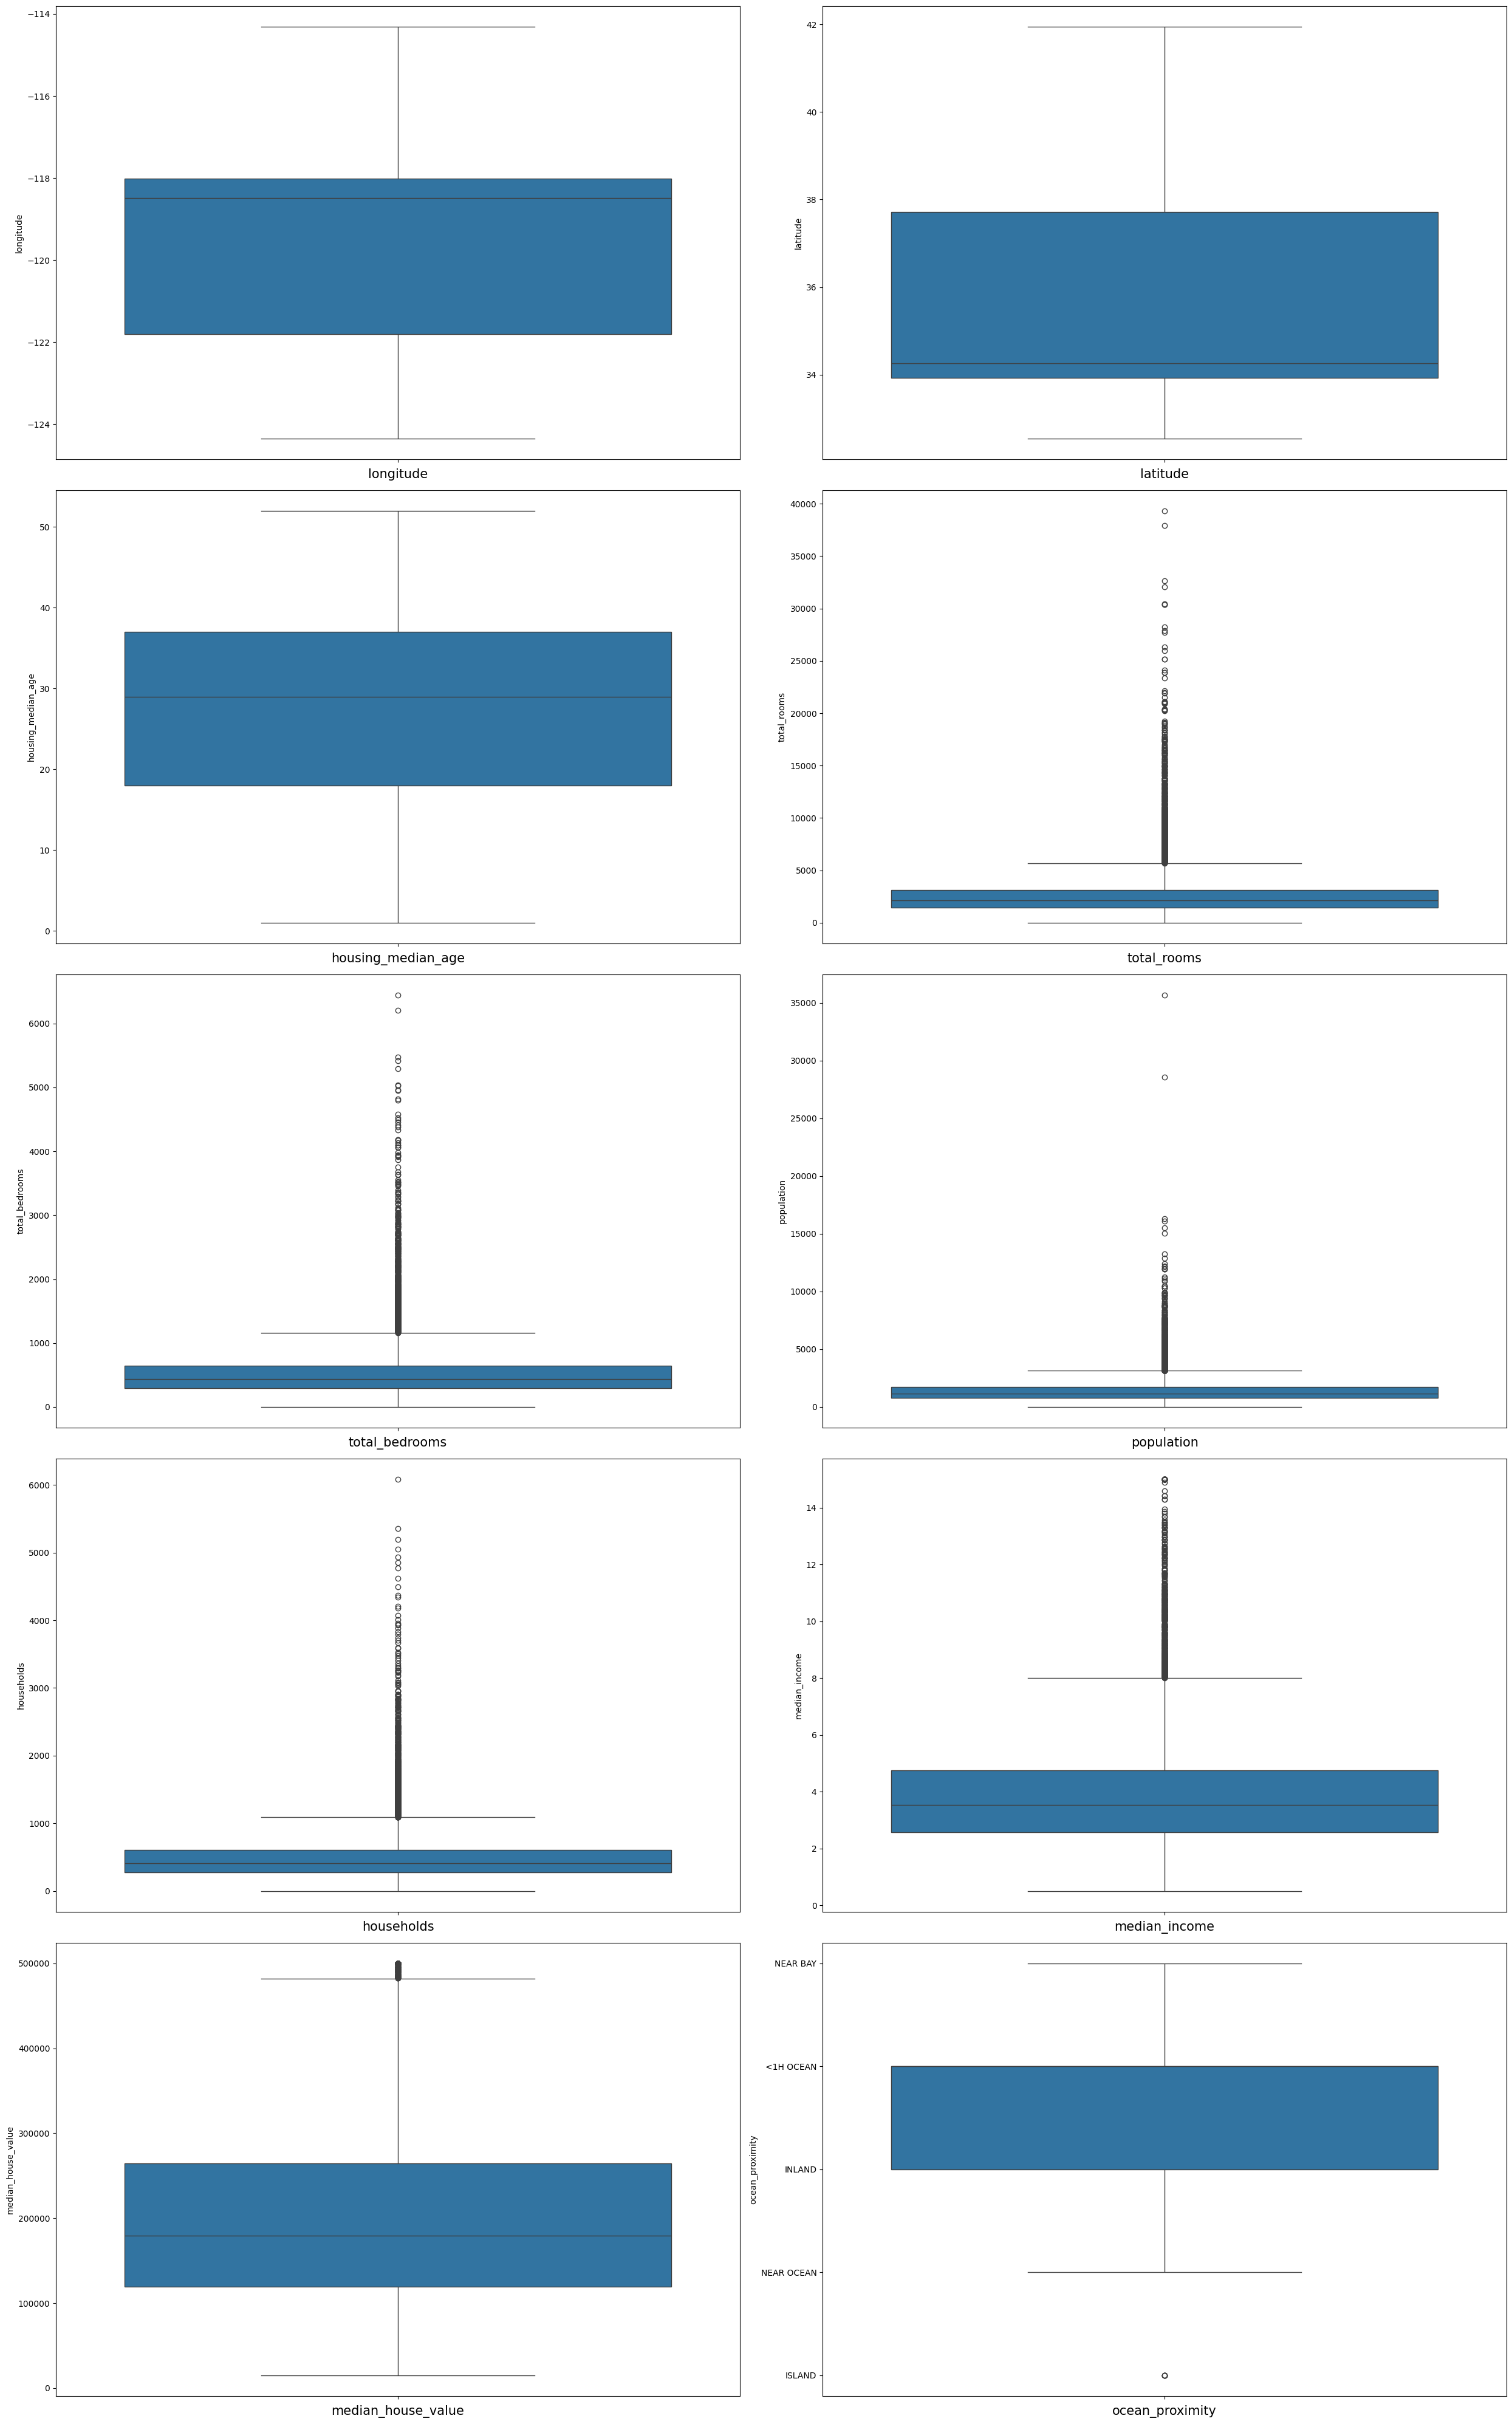

In [475]:
# use for check the ouliers value
plt.figure(figsize=(25,40)) # define the plot size
plt_num = 1
for column in data:
    if plt_num <= 10:
        plt.subplot(5,2,plt_num)
        sns.boxplot(data[column]) # create the Box plot
        plt.xlabel(column,fontsize =15)
    plt_num += 1
plt.tight_layout()

* Here we can see the outliers in many columns.

<Axes: xlabel='total_rooms'>

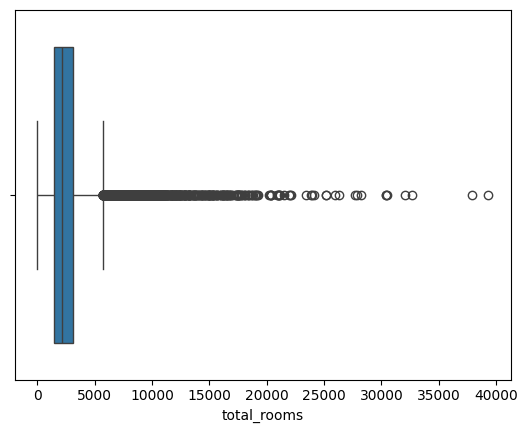

In [476]:
sns.boxplot(x = data.total_rooms) # use for check the outliers value

In [477]:
data.total_rooms.median() # find the median

2127.0

In [478]:
data.loc[data["total_rooms"] >= 20000,"total_rooms"] = 2127.0 # handle the outliers value

<Axes: xlabel='total_rooms'>

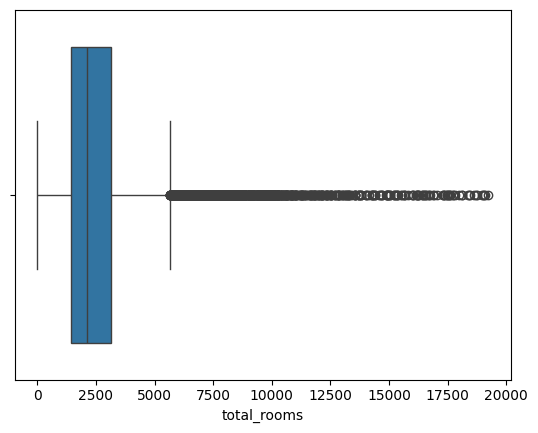

In [479]:
sns.boxplot(x = data.total_rooms) # use for check the outliers value

<Axes: xlabel='total_bedrooms'>

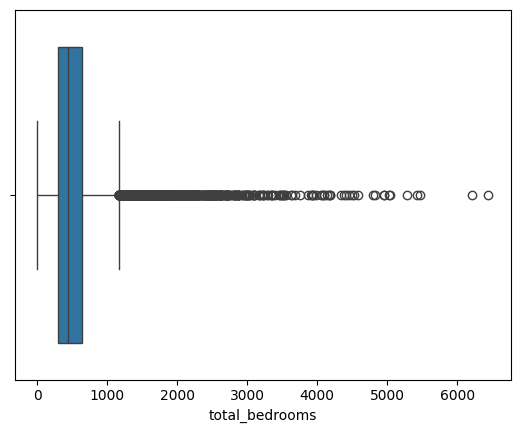

In [480]:
sns.boxplot(x = data.total_bedrooms) # use for check the outliers value

In [481]:
data.total_bedrooms.median() # find the median

435.0

In [482]:
data.loc[data["total_bedrooms"] >= 3500,"total_bedrooms"] = 435.0 # handle the outliers value

<Axes: xlabel='total_bedrooms'>

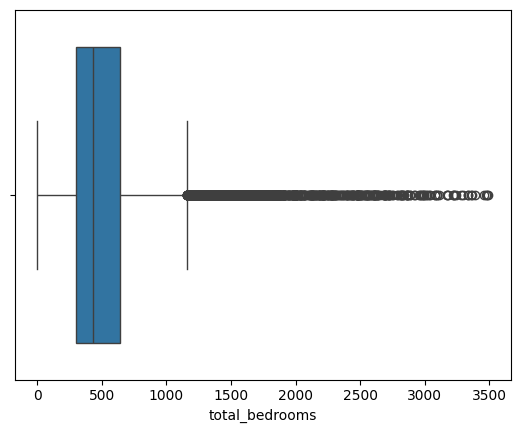

In [483]:
sns.boxplot(x = data.total_bedrooms) # use for check the outliers value

<Axes: xlabel='population'>

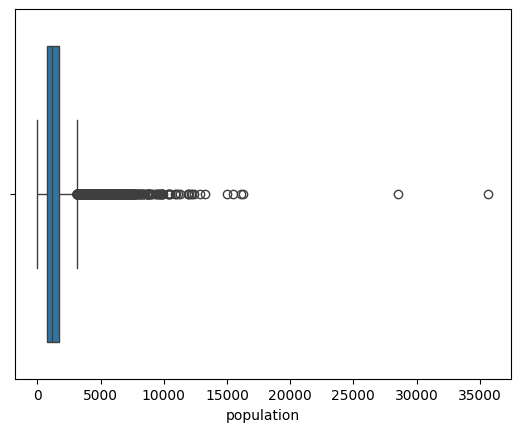

In [484]:
sns.boxplot(x = data.population) # use for check the outliers value

In [485]:
data.population.median() # find the median

1166.0

In [486]:
data.loc[data["population"] >= 10000,"population"] = 1166.0 # handle the outliers value

<Axes: xlabel='population'>

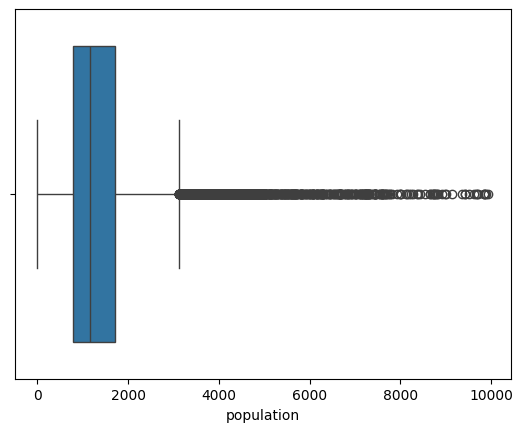

In [487]:
sns.boxplot(x = data.population) # use for check the outliers value

<Axes: xlabel='households'>

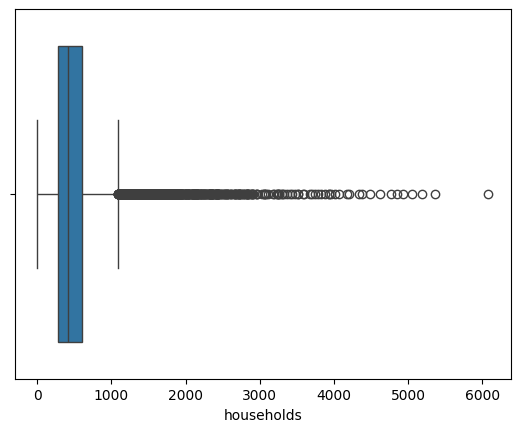

In [488]:
sns.boxplot(x = data.households) # use for check the outliers value

In [489]:
data.households.median() # find the median

409.0

In [490]:
data.loc[data["households"] >= 4000,"households"] = 409.0 # handle the outliers value

<Axes: xlabel='households'>

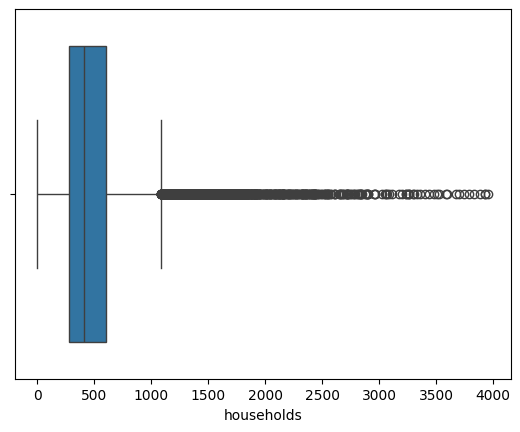

In [491]:
sns.boxplot(x = data.households) # use for check the outliers value

<Axes: xlabel='median_income'>

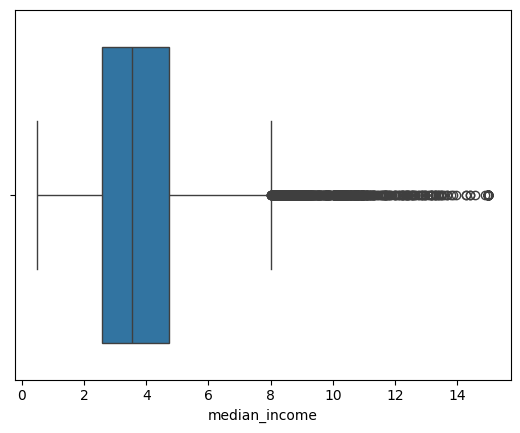

In [492]:
sns.boxplot(x = data.median_income) # use for check the outliers value

In [493]:
data.median_income.median() # find the median

3.5347999999999997

In [494]:
data.loc[data["median_income"] >= 14,"median_income"] = 3.5347999999999997 # handle the outliers value

<Axes: xlabel='median_income'>

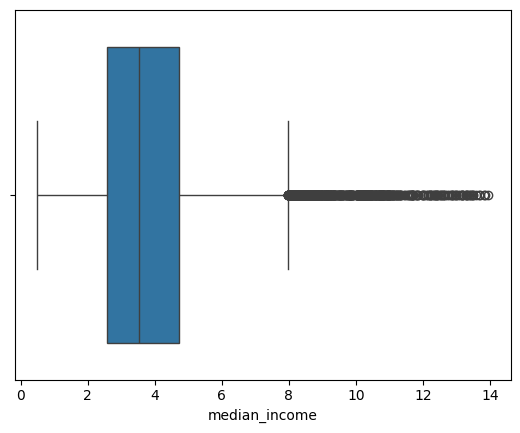

In [495]:
sns.boxplot(x = data.median_income) # use for check the outliers value

<Axes: xlabel='median_house_value'>

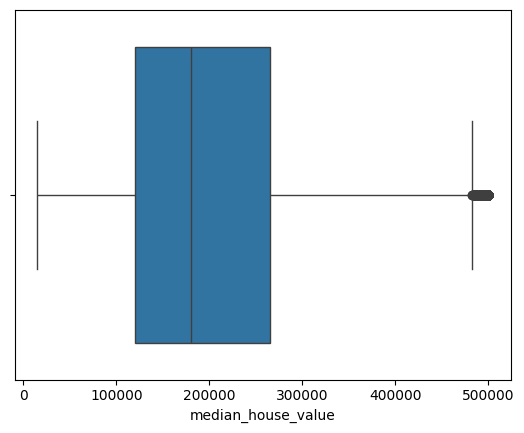

In [496]:
sns.boxplot(x = data.median_house_value) # use for check the outliers value

In [497]:
data.head() # showning the top 5 data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [498]:
from sklearn.preprocessing import OneHotEncoder # import the encoding
OE = OneHotEncoder() # call the encoding
df = pd.get_dummies(data["ocean_proximity"],dtype="int",prefix="Ocean") # convert the data into numerical

In [499]:
df

Ocean_<1H OCEAN  Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  \
0                    0             0             0               1   
1                    0             0             0               1   
2                    0             0             0               1   
3                    0             0             0               1   
4                    0             0             0               1   
...                ...           ...           ...             ...   
20635                0             1             0               0   
20636                0             1             0               0   
20637                0             1             0               0   
20638                0             1             0               0   
20639                0             1             0               0   

       Ocean_NEAR OCEAN  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
20635                 0  
20636                 0  
20637                 0  
20638                 0  
20639                 0  

[20640 rows x 5 columns]

In [500]:
data1 = pd.concat([data,df],axis=1) # concate the two table

In [501]:
data1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  Ocean_<1H OCEAN  Ocean_INLAND  Ocean_ISLAND  \
0            NEAR BAY                0             0             0   
1            NEAR BAY                0             0             0   
2            NEAR BAY                0             0             0   
3            NEAR BAY                0             0             0   
4            NEAR BAY                0             0             0   
...               ...              ...           ...           ...   
20635          INLAND                0             1             0   
20636          INLAND                0             1             0   
20637          INLAND                0             1             0   
20638          INLAND                0             1             0   
20639          INLAND                0             1             0   

       Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0                   1                 0  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   1                 0  
...               ...               ...  
20635               0                 0  
20636               0                 0  
20637               0                 0  
20638               0                 0  
20639               0                 0  

[20640 rows x 15 columns]

In [502]:
# drop the column
data2 = data1.drop("ocean_proximity",axis=1)

In [503]:
data2.head() # showning the top 5 data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  Ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0                0   
1      2401.0      1138.0         8.3014            358500.0                0   
2       496.0       177.0         7.2574            352100.0                0   
3       558.0       219.0         5.6431            341300.0                0   
4       565.0       259.0         3.8462            342200.0                0   

   Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

## Featuer Engineering

<Axes: >

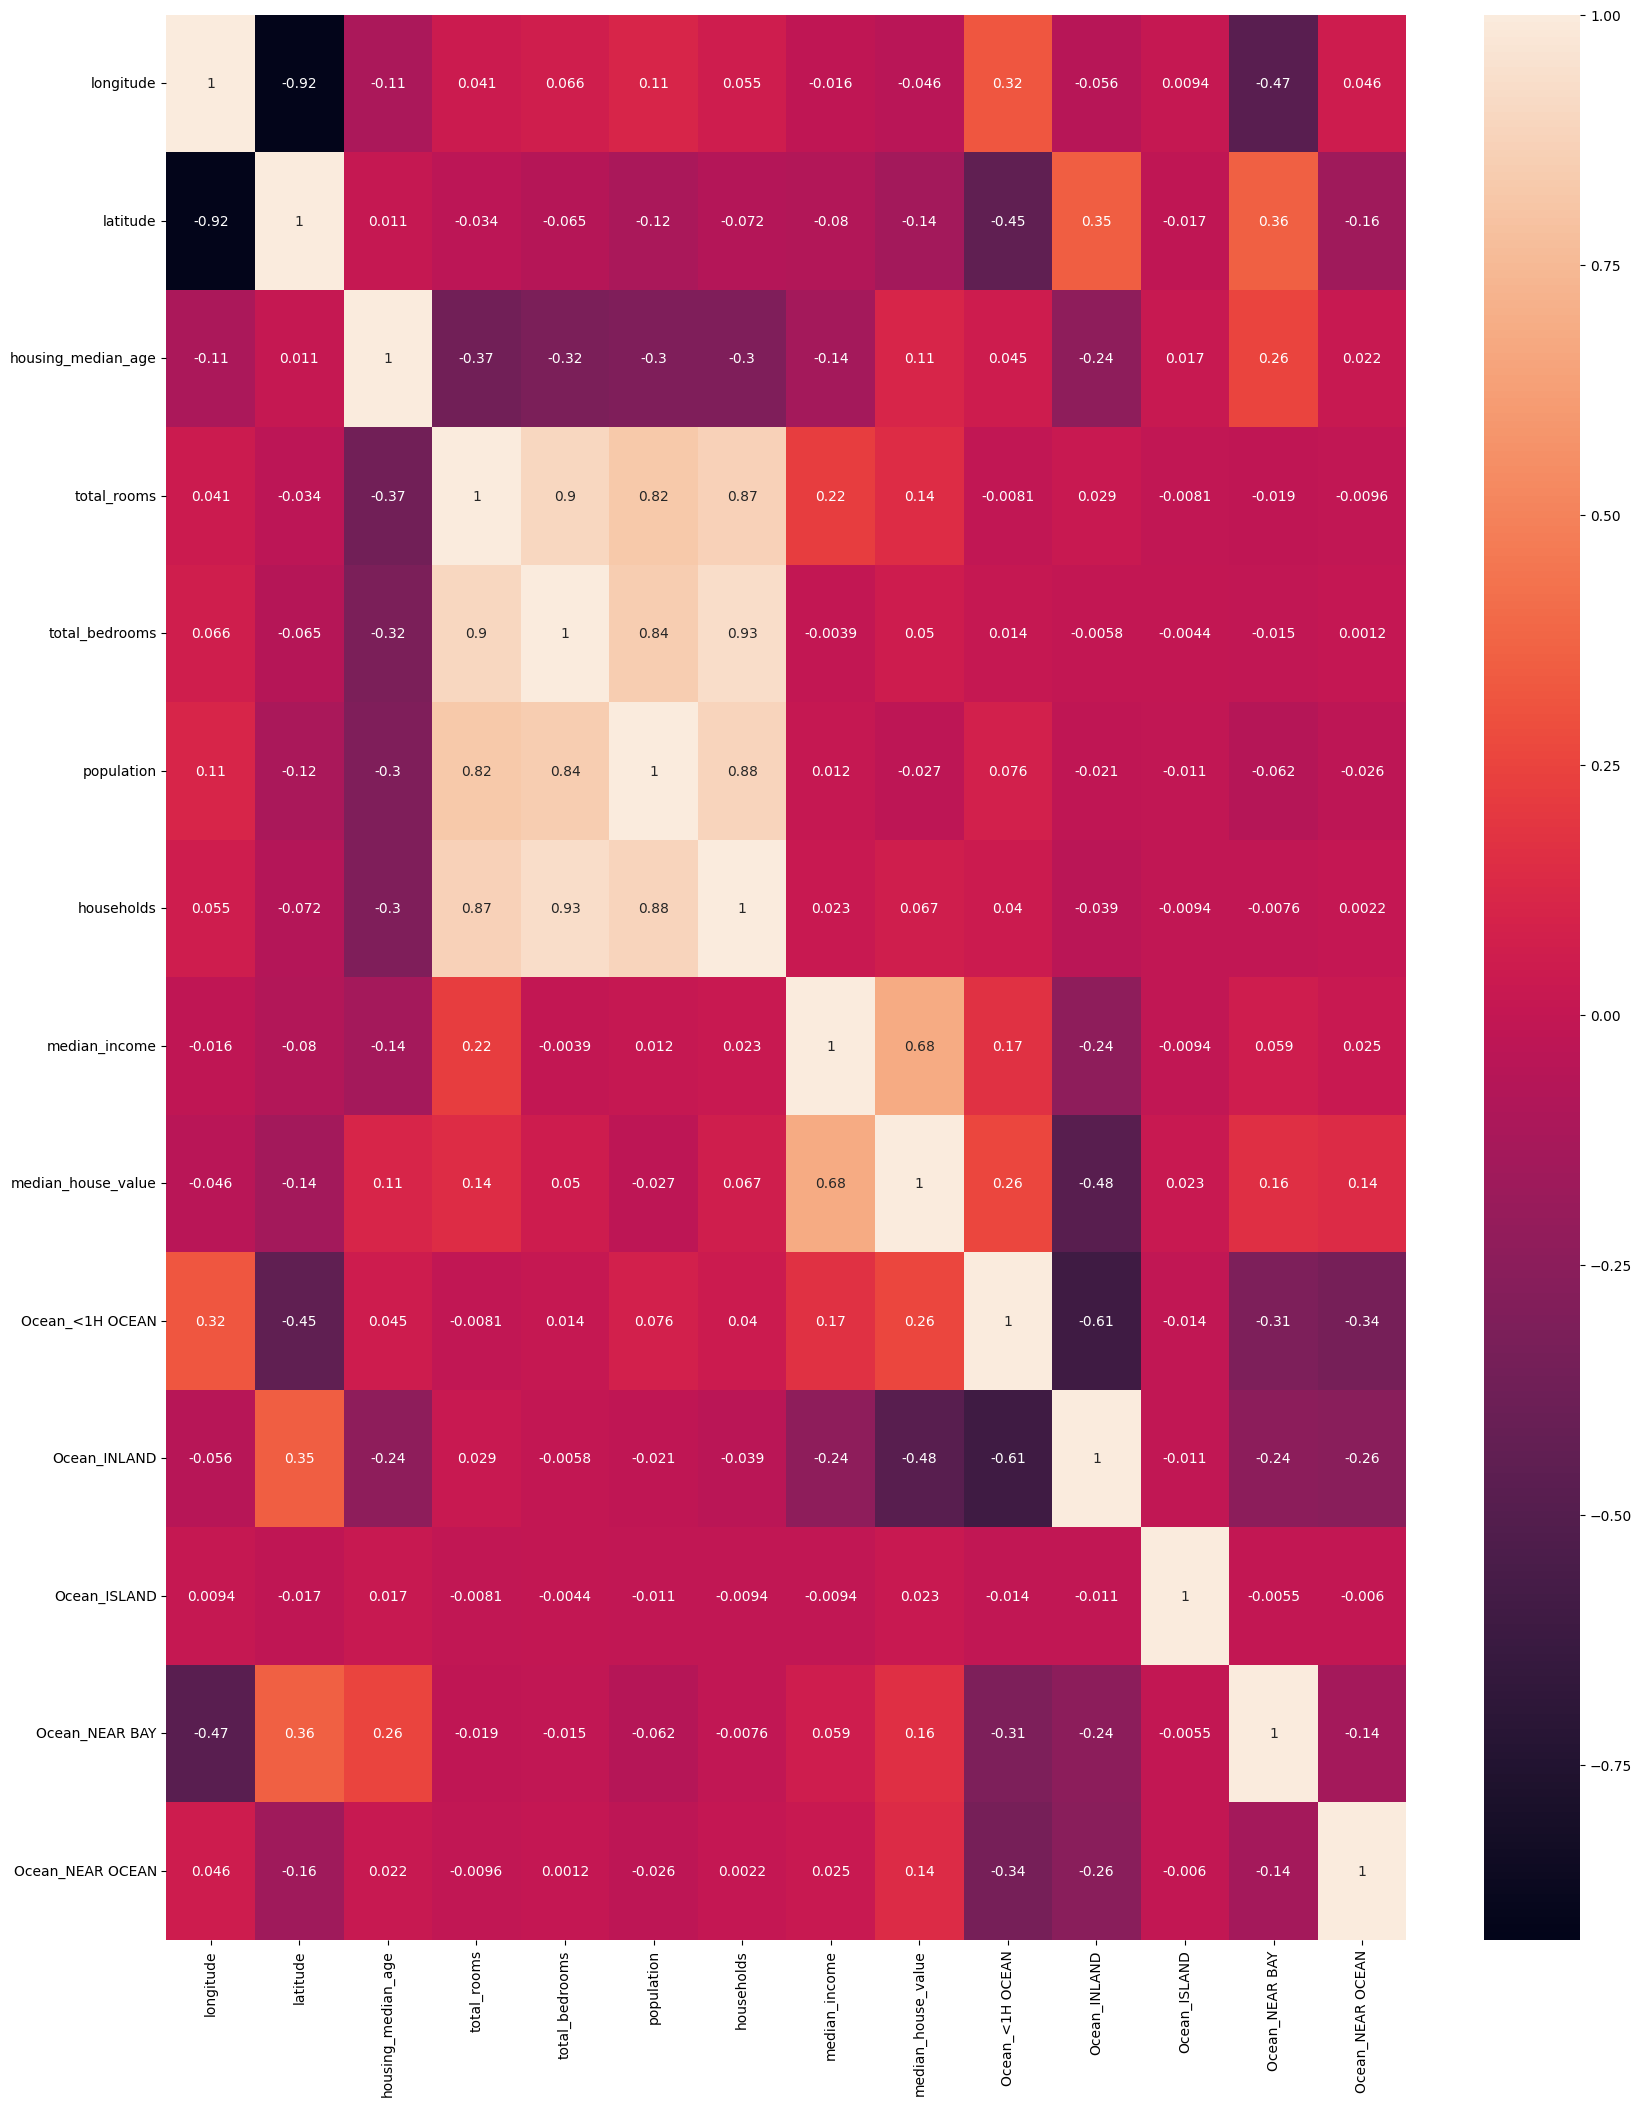

In [504]:
plt.figure(figsize=(20,25))
sns.heatmap(data2.corr(),annot=True)

* Here we can see the not high corelation between two columns.

## Linear Regression Algorithm Model

In [505]:
data2.head() # showning the top 5 data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  Ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0                0   
1      2401.0      1138.0         8.3014            358500.0                0   
2       496.0       177.0         7.2574            352100.0                0   
3       558.0       219.0         5.6431            341300.0                0   
4       565.0       259.0         3.8462            342200.0                0   

   Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

In [506]:
x = data2.drop("median_house_value",axis=1) # create the independent variable
y = data2.median_house_value # create the dependent variable

In [507]:
x

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  Ocean_<1H OCEAN  Ocean_INLAND  \
0           322.0       126.0         8.3252                0             0   
1          2401.0      1138.0         8.3014                0             0   
2           496.0       177.0         7.2574                0             0   
3           558.0       219.0         5.6431                0             0   
4           565.0       259.0         3.8462                0             0   
...           ...         ...            ...              ...           ...   
20635       845.0       330.0         1.5603                0             1   
20636       356.0       114.0         2.5568                0             1   
20637      1007.0       433.0         1.7000                0             1   
20638       741.0       349.0         1.8672                0             1   
20639      1387.0       530.0         2.3886                0             1   

       Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0                 0               1                 0  
1                 0               1                 0  
2                 0               1                 0  
3                 0               1                 0  
4                 0               1                 0  
...             ...             ...               ...  
20635             0               0                 0  
20636             0               0                 0  
20637             0               0                 0  
20638             0               0                 0  
20639             0               0                 0  

[20640 rows x 13 columns]

In [508]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [509]:
from sklearn.preprocessing import MinMaxScaler # import the scalling
ME = MinMaxScaler() # call thescalling
df2 = ME.fit_transform(x) # tranform the data certain range

In [510]:
df2

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 1.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 1.        ,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        0.        ]])

In [511]:
x.columns # show the all columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Ocean_<1H OCEAN', 'Ocean_INLAND', 'Ocean_ISLAND', 'Ocean_NEAR BAY',
       'Ocean_NEAR OCEAN'],
      dtype='object')

In [512]:
# scalling data store in the dataframe
x1 = pd.DataFrame(data=df2,columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Ocean_1H OCEAN', 'Ocean_INLAND', 'Ocean_ISLAND', 'Ocean_NEAR BAY',
       'Ocean_NEAR OCEAN'])

In [513]:
x1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.211155  0.567481            0.784314     0.045653        0.036655   
1       0.212151  0.565356            0.392157     0.369020        0.316438   
2       0.210159  0.564293            1.000000     0.076175        0.054124   
3       0.209163  0.564293            1.000000     0.066140        0.067010   
4       0.209163  0.564293            1.000000     0.084495        0.079897   
...          ...       ...                 ...          ...             ...   
20635   0.324701  0.737513            0.470588     0.086470        0.106816   
20636   0.312749  0.738576            0.333333     0.036138        0.042669   
20637   0.311753  0.732200            0.313725     0.117097        0.138603   
20638   0.301793  0.732200            0.333333     0.096610        0.116838   
20639   0.309761  0.725824            0.294118     0.144707        0.176117   

       population  households  median_income  Ocean_1H OCEAN  Ocean_INLAND  \
0        0.032115    0.031590       0.581932             0.0           0.0   
1        0.241417    0.287339       0.580162             0.0           0.0   
2        0.049633    0.044478       0.502525             0.0           0.0   
3        0.055874    0.055092       0.382477             0.0           0.0   
4        0.056579    0.065201       0.248849             0.0           0.0   
...           ...         ...            ...             ...           ...   
20635    0.084768    0.083144       0.078857             0.0           1.0   
20636    0.035538    0.028557       0.152962             0.0           1.0   
20637    0.101077    0.109174       0.089246             0.0           1.0   
20638    0.074298    0.087945       0.101680             0.0           1.0   
20639    0.139334    0.133687       0.140454             0.0           1.0   

       Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0               0.0             1.0               0.0  
1               0.0             1.0               0.0  
2               0.0             1.0               0.0  
3               0.0             1.0               0.0  
4               0.0             1.0               0.0  
...             ...             ...               ...  
20635           0.0             0.0               0.0  
20636           0.0             0.0               0.0  
20637           0.0             0.0               0.0  
20638           0.0             0.0               0.0  
20639           0.0             0.0               0.0  

[20640 rows x 13 columns]

In [514]:
y1 = data2.median_house_value

In [515]:
y1

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [516]:
from sklearn.model_selection import train_test_split  # import the train test split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=40) # split the data

In [517]:
x_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19697   0.270916  0.697131            0.411765     0.186304        0.156644   
17749   0.250000  0.510096            0.627451     0.052881        0.054410   
4286    0.600598  0.165781            1.000000     0.040765        0.077033   
19629   0.349602  0.530287            0.254902     0.189320        0.201890   
656     0.220120  0.549416            0.333333     0.202943        0.288087   
...          ...       ...                 ...          ...             ...   
11532   0.623506  0.130712            0.490196     0.278546        0.431558   
16065   0.186255  0.553666            0.941176     0.114445        0.116266   
14501   0.709163  0.034006            0.294118     0.062292        0.133734   
14555   0.719124  0.044633            0.274510     0.117772        0.083333   
11590   0.631474  0.131775            0.490196     0.121724        0.107675   

       population  households  median_income  Ocean_1H OCEAN  Ocean_INLAND  \
19697    0.176583    0.145565       0.273226             0.0           1.0   
17749    0.094131    0.054081       0.267195             1.0           0.0   
4286     0.075808    0.068739       0.128742             1.0           0.0   
19629    0.208094    0.175891       0.197247             0.0           1.0   
656      0.220880    0.263584       0.237471             0.0           0.0   
...           ...         ...            ...             ...           ...   
11532    0.183832    0.351782       0.094266             1.0           0.0   
16065    0.105608    0.102098       0.292822             0.0           0.0   
14501    0.064935    0.111701       0.189268             0.0           0.0   
14555    0.118494    0.072782       0.461966             1.0           0.0   
11590    0.117084    0.094011       0.409018             1.0           0.0   

       Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
19697           0.0             0.0               0.0  
17749           0.0             0.0               0.0  
4286            0.0             0.0               0.0  
19629           0.0             0.0               0.0  
656             0.0             1.0               0.0  
...             ...             ...               ...  
11532           0.0             0.0               0.0  
16065           0.0             1.0               0.0  
14501           0.0             0.0               1.0  
14555           0.0             0.0               0.0  
11590           0.0             0.0               0.0  

[15480 rows x 13 columns]

In [518]:
x_test

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6607    0.618526  0.174283            0.901961     0.179649        0.177835   
884     0.237052  0.531350            0.588235     0.101238        0.098225   
9457    0.050797  0.774708            0.352941     0.075863        0.097079   
18681   0.251992  0.459086            0.313725     0.081687        0.077606   
4654    0.599602  0.160468            0.921569     0.124948        0.150630   
...          ...       ...                 ...          ...             ...   
11538   0.631474  0.128587            0.568627     0.175645        0.206472   
17075   0.213147  0.524973            0.705882     0.068844        0.095647   
9695    0.272908  0.439957            0.705882     0.163634        0.238259   
7969    0.613546  0.141339            0.803922     0.062968        0.076747   
56      0.206175  0.561105            1.000000     0.064268        0.082188   

       population  households  median_income  Ocean_1H OCEAN  Ocean_INLAND  \
6607     0.170845    0.146070       0.224323             1.0           0.0   
884      0.098963    0.081122       0.307501             1.0           0.0   
9457     0.051545    0.057114       0.076440             0.0           0.0   
18681    0.013994    0.013647       0.124339             0.0           0.0   
4654     0.187758    0.126611       0.213808             1.0           0.0   
...           ...         ...            ...             ...           ...   
11538    0.228128    0.164519       0.299328             1.0           0.0   
17075    0.177993    0.084407       0.187014             0.0           0.0   
9695     0.347629    0.198888       0.175079             1.0           0.0   
7969     0.062922    0.057619       0.237880             1.0           0.0   
56       0.062318    0.065201       0.074797             0.0           0.0   

       Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
6607            0.0             0.0               0.0  
884             0.0             0.0               0.0  
9457            0.0             0.0               1.0  
18681           0.0             0.0               1.0  
4654            0.0             0.0               0.0  
...             ...             ...               ...  
11538           0.0             0.0               0.0  
17075           0.0             1.0               0.0  
9695            0.0             0.0               0.0  
7969            0.0             0.0               0.0  
56              0.0             1.0               0.0  

[5160 rows x 13 columns]

#### Linear Regression Algorithm

In [519]:
from sklearn.linear_model import LinearRegression # import the Linear regression model
LR = LinearRegression() # call the algorithm
LR.fit(x_train,y_train) # train the data

LinearRegression()

In [520]:
y_lr = LR.predict(x_test) # predict the data

In [521]:
y_lr

array([225280., 263936., 134656., ..., 178176., 236032., 164864.])

In [522]:
y_test # testing data

6607     226500.0
884      196200.0
9457     145800.0
18681    420000.0
4654     257800.0
           ...   
11538    186000.0
17075    218100.0
9695     127600.0
7969     152100.0
56        87500.0
Name: median_house_value, Length: 5160, dtype: float64

In [523]:
len(y_test)

5160

In [524]:
# import linear regression metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [525]:
r21 = r2_score(y_test,y_lr) # check the model performance
r21

0.6243543256959092

In [526]:
mean_absolute_error(y_test,y_lr) # find the absoluter error

51247.68546511628

In [527]:
y_trlr = LR.predict(x_train) # predict the training data

In [528]:
r2_score(y_train,y_trlr) # check the model performance

0.6378315464946649

In [529]:
# adjusted r2 score
adjusted = 1 - (1 - 0.6243543256959092)*(5160 - 1) / (5160 - 13 - 1)
adjusted

0.623405356833501

## SVM:- Support Vectore Machine

In [530]:
from sklearn.svm import SVR # import the svm model
SVM = SVR() # call the svm algorithm
SVM.fit(x_train,y_train) # train the data

SVR()

In [531]:
y_svm = SVM.predict(x_test) # predict the testing data

In [532]:
r22 = r2_score(y_test,y_svm) # check the model performance
r22

-0.058477680412101884

In [533]:
y_trsvm = SVM.predict(x_train) # predict the training data

In [534]:
r2_score(y_train,y_trsvm) # check the model performance

-0.042877347038056346

## Decision Tree

In [535]:
from sklearn.tree import DecisionTreeRegressor # import the DT algorithm
DT = DecisionTreeRegressor() # call the DT algorithm
DT.fit(x_train,y_train) # train the data

DecisionTreeRegressor()

In [536]:
y_dt = DT.predict(x_test) # predict the testing data

In [537]:
r23 = r2_score(y_test,y_dt) # check the model performance
r23

0.6250126145916195

In [538]:
mean_absolute_error(y_test,y_dt) # check mean absolute error

45119.9476744186

In [539]:
y_trdt = DT.predict(x_train) # predict the training data

In [540]:
r2_score(y_train,y_trdt) # check the model performance

1.0

In [541]:
# adjusted r2 score
adjusteddt = 1 - (1 - 0.6234965310395568) * (5160 - 1) / (5160 - 13 - 1)
adjusteddt

0.62254539518715

## KNN:- K Nearest Niegbour 

In [542]:
from sklearn.neighbors import KNeighborsRegressor # import the knn algorithm
KNN = KNeighborsRegressor() # call the knn algorithm
KNN.fit(x_train,y_train) # train the model

KNeighborsRegressor()

In [543]:
y_knn = KNN.predict(x_test) # predict the testing data

In [544]:
r24 = r2_score(y_test,y_knn) # check the model performance
r24

0.703407645574882

In [545]:
mean_absolute_error(y_test,y_knn) # check mean absolute error

42149.2496124031

## Bagging Algorithm

In [546]:
from sklearn.ensemble import BaggingRegressor # import the bagging algorithm
modelbg = DecisionTreeRegressor() # call the decision tree algorithm
BG = BaggingRegressor(estimator=modelbg) # call the bagging model
BG.fit(x_train,y_train) # train the model

BaggingRegressor(estimator=DecisionTreeRegressor())

In [547]:
y_bg = BG.predict(x_test) # predict the testing data

In [548]:
r25 = r2_score(y_test,y_bg) # check the model performance
r25

0.7889344450363864

In [549]:
mean_absolute_error(y_test,y_bg) # check mean absolute error

34997.112674418604

In [550]:
y_trbg = BG.predict(x_train) # predict the traning data

In [551]:
r2_score(y_train,y_trbg) # check the model performance

0.9641275358653141

## Random Forest Algorithm

In [552]:
from sklearn.ensemble import RandomForestRegressor # import the RandomForest Algorithm
RM = RandomForestRegressor() # call the RandomForest model
RM.fit(x_train,y_train) # train the data

RandomForestRegressor()

In [553]:
y_rm = RM.predict(x_test) # predict the testing data

In [554]:
r26 = r2_score(y_test,y_rm) # check the model performance
r26

0.8088263283393118

In [555]:
mean_absolute_error(y_test,y_rm) # check mean absolute error

32858.557674418604

In [556]:
y_trrm = RM.predict(x_train) # predict the traning data

In [557]:
r2_score(y_train,y_trrm) # check the model performance

0.9746617775126775

## Gradiant Boosting Algorithm

In [558]:
from sklearn.ensemble import GradientBoostingRegressor # import the gradiant algorithm
GB = GradientBoostingRegressor() # call the gradiant model
GB.fit(x_train,y_train) # train the model

GradientBoostingRegressor()

In [559]:
y_gb = GB.predict(x_test) # predict the testing data

In [560]:
r27 = r2_score(y_test,y_gb) # check the model performance
r27

0.7579486185689098

In [561]:
mean_absolute_error(y_test,y_gb) # check mean absolute error

39941.41125078733

## Xtrame Gradiant Boosting

In [562]:
from xgboost import XGBRegressor # call the xgb algorithm
xgb = XGBRegressor(n_estimators=110,learning_rate=0.1,max_depth=5) # call the xgb algorithm
xgb.fit(x_train,y_train) # train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=110, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [563]:
y_xgb = xgb.predict(x_test) # predict the testing data

In [564]:
r28 = r2_score(y_test,y_xgb) # check the model performance
r28

0.8077677853333114

In [565]:
mean_absolute_error(y_test,y_xgb) # check mean absolute error

34643.81538048086

In [566]:
y_trxgb = xgb.predict(x_train) # predict the traning data

In [567]:
r2_score(y_train,y_trxgb) # check the model performance

0.8614839587159311

In [568]:
err = y_test - y_xgb # find the error value
err

6607      39768.687500
884      -50827.703125
9457      45216.000000
18681    218863.515625
4654      -4673.937500
             ...      
11538    -20794.453125
17075     24667.296875
9695     -49721.531250
7969     -66989.906250
56       -62844.109375
Name: median_house_value, Length: 5160, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

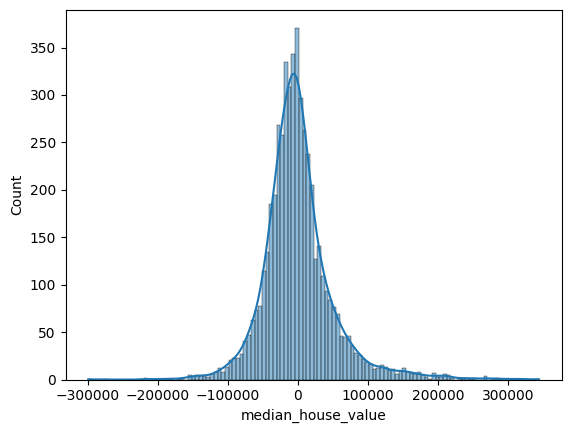

In [569]:
sns.histplot(x = err,kde=True) # check the error show is noraml distribution or not

* Here It is a show the normal distribution based on error value.

## Adda Boosting Lagorithm

In [570]:
from sklearn.ensemble import AdaBoostRegressor # import ada boosting algorithm
model_Ad = DecisionTreeRegressor() # call the DT model
AD = AdaBoostRegressor(estimator=model_Ad, n_estimators=100, learning_rate=0.1,loss='linear') # call the AD model
AD.fit(x_train,y_train) # train the model

AdaBoostRegressor(estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=100)

In [571]:
y_ad = AD.predict(x_test) # predict the test data

In [572]:
r29 = r2_score(y_test,y_ad) # check the model performance
r29

0.8086278076374781

In [573]:
y_trad = AD.predict(x_train) # predict the train data

In [574]:
r2_score(y_train,y_trad)  # check the model performance

0.9999959118948173

In [576]:
import lightgbm as lgb # import the lgb
LGB = lgb.Dataset(x_train, label=y_train) # train the model

In [577]:
# Hyperparamter of LGB
params = {
    'objective': 'regression',  # Use for classification tasks
    'metric': 'r2_score',  # Evaluation metric
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1  # Suppress output
}

model_lgb = lgb.train(params, LGB, num_boost_round=100)

# check the Make predictions
y_lgb = model_lgb.predict(x_test)

In [578]:
r211 = r2_score(y_test,y_lgb) # check the model performance
r211

0.8199749060973137

In [579]:
y_trlgb = model_lgb.predict(x_train) # check the traning data

In [580]:
r2_score(y_train,y_trlgb) # check the model performance

0.8758213583819481

## ANN:- Artificial Neural Netwrok

In [614]:
from sklearn.neural_network import MLPRegressor # import Ann Algorithm
ANN = MLPRegressor(hidden_layer_sizes=(50,100,200,450),activation='relu',solver='adam',alpha=0.0001,learning_rate='constant') # call the Ann algorithm
ANN.fit(x_train,y_train) # train the model

MLPRegressor(hidden_layer_sizes=(50, 100, 200, 450))

In [615]:
y_ann = ANN.predict(x_test)  # predict the testing data

In [616]:
r210 = r2_score(y_test,y_ann) # check the model performance
r210

0.7241668575553997

In [617]:
y_trann = ANN.predict(x_train) # predict the testing data

In [618]:
r2_score(y_train,y_trann) # check the model performance

0.7370100672816111

In [592]:
err_an = y_test - y_ann # check the error value
err_an

6607      12371.739627
884      -31185.140080
9457      15550.960190
18681    152738.706001
4654      79038.529140
             ...      
11538    -47981.853517
17075     70477.162623
9695     -46606.150717
7969     -90776.312260
56       -78590.563029
Name: median_house_value, Length: 5160, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

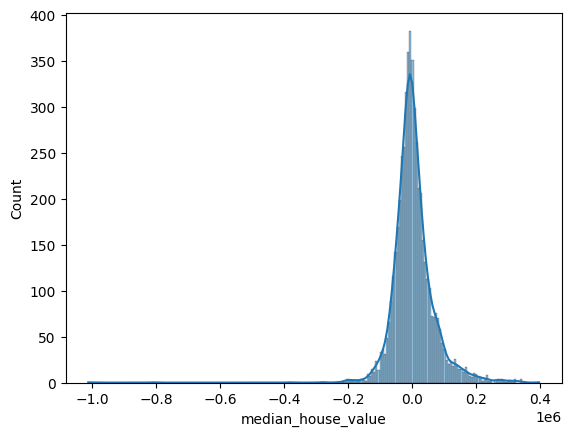

In [593]:
sns.histplot(x = err_an, kde=True) # check the error show is noraml distribution or not

* Here It is a show the normal distribution based on error value.

## Cross Validation

In [581]:
from sklearn.model_selection import cross_val_score # import the cross validation score
score = cross_val_score(xgb,x1,y1,cv=15,scoring="r2") # create the cross validation 
score

array([0.21240438, 0.69836709, 0.85017933, 0.73474647, 0.51108626,
       0.41675338, 0.81030224, 0.58395495, 0.65740381, 0.63079176,
       0.36479767, 0.50813108, 0.55587235, 0.74289075, 0.6669912 ])

In [582]:
score.mean() # find the mean of the model performance 

0.5963115143948733

## Model Comparison Report

In [619]:
# check the All model r2 score in DataFrame
score = pd.DataFrame({"Model Name":["LinearRegression","SVM","DecisionTreeRegressor","KNN","Bagging","RandomForestRegressor","GradiantBoostingRegressor","XGBRegressor","AddaBoostingRegressor","Light Boosting","ANN_MLPRegressor"],
                     "R2_Score":[r21*100,r22*100,r23*100,r24*100,r25,r26*100,r27*100,r28*100,r29*100,r211*100,r210*100,]})
score

Model Name   R2_Score
0            LinearRegression  62.435433
1                         SVM  -5.847768
2       DecisionTreeRegressor  62.501261
3                         KNN  70.340765
4                     Bagging   0.788934
5       RandomForestRegressor  80.882633
6   GradiantBoostingRegressor  75.794862
7                XGBRegressor  80.776779
8       AddaBoostingRegressor  80.862781
9              Light Boosting  81.997491
10           ANN_MLPRegressor  72.416686

### Final Conclusion:-
* Here we use the Total 11 Algorithm in this dataset like Linear Regression, SVM, Desicion Tree, KNN, bagging, Random Forest, Gradinat Boosting,
XGBoost Algorithm, Adda Boosting, List Boosting Algorithm, Artificial Nueral Network.
* Here we can see the model camprision report show the high r2 score is Light Boosting Algorithm but it is a Overfiting problem.
* Here we can see the model camprision report show the high r2 score is Adda Boosting Algorithm but it is a Overfiting problem.
* Here best Algorithm is XGB Boosting Algorithm And It is a Jounralized Model.
* XGB Boosting Algorithm r2 score is 80.86.

### Model Save

In [596]:
import pickle
with open("House.pkl","wb") as f: # save the file
    pickle.dump(xgb,f)

In [597]:
with open("House.pkl","rb") as f: # load the file
    file = pickle.load(f)

In [598]:
file # import the file

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=110, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [605]:
x1.head() # check the data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.045653        0.036655   
1   0.212151  0.565356            0.392157     0.369020        0.316438   
2   0.210159  0.564293            1.000000     0.076175        0.054124   
3   0.209163  0.564293            1.000000     0.066140        0.067010   
4   0.209163  0.564293            1.000000     0.084495        0.079897   

   population  households  median_income  Ocean_1H OCEAN  Ocean_INLAND  \
0    0.032115    0.031590       0.581932             0.0           0.0   
1    0.241417    0.287339       0.580162             0.0           0.0   
2    0.049633    0.044478       0.502525             0.0           0.0   
3    0.055874    0.055092       0.382477             0.0           0.0   
4    0.056579    0.065201       0.248849             0.0           0.0   

   Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0           0.0             1.0               0.0  
1           0.0             1.0               0.0  
2           0.0             1.0               0.0  
3           0.0             1.0               0.0  
4           0.0             1.0               0.0

In [607]:
data2.head() # check the data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  Ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0                0   
1      2401.0      1138.0         8.3014            358500.0                0   
2       496.0       177.0         7.2574            352100.0                0   
3       558.0       219.0         5.6431            341300.0                0   
4       565.0       259.0         3.8462            342200.0                0   

   Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

In [609]:
# Predict the data
file.predict([[0.209163,	0.564293	,1.000000	,0.066140	,0.067010	,0.055874	,0.055092	,0.382477	,0.0	,0.0	,0.0	,1.0	,0.0]])

array([320876.16], dtype=float32)

                                                                ! Thank You !